# Machine Learning - Exercise 7
# Kernel Methods

## Import 

Import libraries that contains the implementations of the functions used in the rest of the program.



In [1]:
import random
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

print("Libraries imported.")

Libraries imported.


# Classification

## Classification data set


Data-generation function

In [3]:
# Param: n=size of data set, outliers=True/False
def generateData(n, outliers=False):
    X = np.ndarray((n,2))
    t = np.ndarray((n,1))
    n1 = int(n*0.5)

    # define random centers of distributions far away
    
    for i in range(0,n1):
        X[i,:] = np.random.normal((2.0,8.5),0.5,size=(1,2))
        t[i] = -1
    for i in range(n1,n):
        X[i,:] = np.random.normal((4.0,5.0),0.3,size=(1,2))
        t[i] = 1
    
    if (outliers):
        no=int(n*0.9)
        for i in range (no,n):
            X[i,:] = np.random.normal((9.0,3.0),0.2,size=(1,2))
            t[i] = 1

    return [X,t]

Generate n data points with/without outliers

In [5]:
n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

# print specs
print("Input shape: %s" %str(X.shape))
print("Output shape: %s" %str(t.shape))
print("Number of attributes/features: %d" %(X.shape[1]))
print("Number of classes: %d" %(len(np.unique(t))))
print("Number of samples: %d" %(X.shape[0]))

# show an example
id = random.randrange(0,X.shape[0])

print("\nExample:")
print("x[%d] = %r" %(id,X[id]))
print("y[%d] = %r" %(id,t[id]))

Input shape: (100, 2)
Output shape: (100, 1)
Number of attributes/features: 2
Number of classes: 2
Number of samples: 100

Example:
x[92] = array([8.99873855, 2.95866754])
y[92] = array([1.])


## Classification model

Choose among different kernel functions for the SVM classifier [info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC):
* Linear
* Polynomial
* Radial Basis Function (RBF)
* Sigmoid

In [6]:
kernel_name  = 'poly' # 'linear', 'poly', 'rbf', 'sigmoid'

# C = Regularization
# kernel = Which kernel we want to choose between the listed above
# degree = Degree of the polynomial fn. Only used with 'poly' kernel.
classifier = svm.SVC(C=1.0, kernel=kernel_name, degree=3, gamma='scale')

Fit classifier

In [10]:
# Train the classifier
# We use ravel, otherwise compiler would complain about not receiving a 1D array as Y.
classifier.fit(X,t.ravel())

SVC(kernel='poly')

## Visualize results

Define visualization functions

In [6]:
# Plot data
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])
            
    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
# Plot results of a solution
def plotResult(X, t, clf, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = clf.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])
        
    plotData(X,t,XNr,XNg,label)

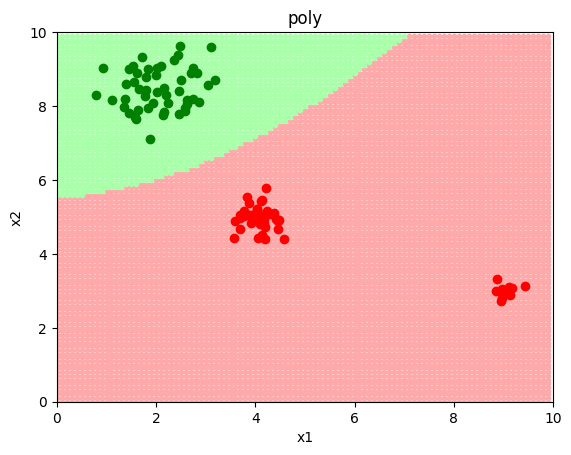

In [12]:
# show results
plotResult(X,t,classifier,kernel_name)

# Regression

In [14]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

print('Dataset: diabetes')
print('Number of features: %d' %diabetes.data.shape[1])
print('Number of samples: %d' %diabetes.data.shape[0])

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

print('Training set size: %d' %len(diabetes_X_train))
print('Test set size: %d' %len(diabetes_X_test))

Dataset: diabetes
Number of features: 10
Number of samples: 442
Training set size: 422
Test set size: 20


## Regression model

Choose among different kernel functions for the SVM regressor [info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR):
* Linear
* Polynomial
* Radial Basis Function (RBF)
* Sigmoid

In [15]:
kernel_name  = 'poly' # 'linear', 'poly', 'rbf', 'sigmoid'

# C = Regularization
# kernel = Which kernel we want to choose between the listed above
# degree = Degree of the polynomial fn. Only used with 'poly' kernel.
regressor = svm.SVR(C=1.0, kernel=kernel_name, degree=3, gamma='scale')

Fit regressor

In [16]:
regressor.fit(diabetes_X_train, diabetes_y_train)

SVR(kernel='poly')

## Regression prediction

In [17]:
# Make predictions using the testing set
diabetes_y_pred = regressor.predict(diabetes_X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Mean squared error: 3174.68
Variance score: 0.34


## Visualize results

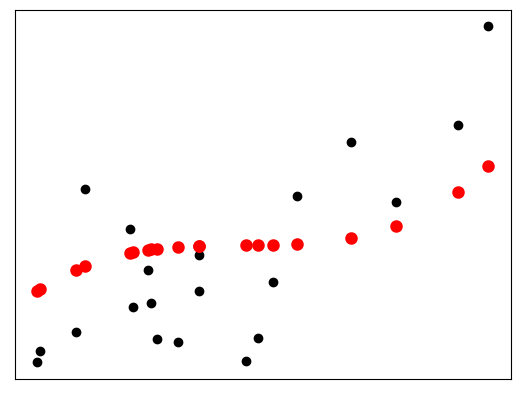

In [18]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.scatter(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

# Hyper-parameter search

Hyper-parameter tuning can be realized by using search or optimization methods.

[GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) is  a simple search routine to determine the best valòues of hyper-parameters among a set of possible predefined values. It uses cross-validation to measure performance of each set of hyper-parameters.

In the following section are showed 2 examples of GridSearch: one for classification and the other for regression.
Then in the cell below are showe the best parameters of each model.

In [19]:
# Example of using GridSearch

#The first parameter is the model
grid_search_classification = GridSearchCV(classifier,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            #'degree': np.arange(1,4,1),
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
print("Grid Search for Classification\n\n")
print(grid_search_classification.fit(X,t))

grid_search_regression = GridSearchCV(regressor,
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            #'degree': np.arange(1,4,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("\n\nGrid Search for Regression\n\n")
print(grid_search_regression.fit(diabetes_X_train,diabetes_y_train))

Grid Search for Classification


Fitting 5 folds for each of 76 candidates, totalling 380 fits


c:\Users\Gianmarco\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='accuracy', verbose=1)


Grid Search for Classification


Fitting 5 folds for each of 76 candidates, totalling 380 fits
GridSearchCV(cv=5, estimator=SVR(kernel='poly'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2', verbose=1)


In [20]:
#Best parameters for the classifier
print("Best classification hyper-parameters: %r" %grid_search_classification.best_params_)
print("Best accuracy: %.1f" %grid_search_classification.best_score_)

#Best parameters for the regressor
print("Best regression hyper-parameters: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.2f" %grid_search_regression.best_score_)

Best classification hyper-parameters: {'C': 0.1, 'kernel': 'linear'}
Best accuracy: 1.0
Best regression hyper-parameters: {'C': 1.9000000000000001, 'kernel': 'sigmoid'}
Best R2 score: 0.28


# Home Exercises

**Question 1**

Test the SVM classifier with different kernel functions on the Iris and Wine datasets. Perform a grid search to provide the best configuration of the hyper-parameters.

In [7]:
# Load the diabetes dataset
iris = datasets.load_iris()
wine = datasets.load_wine()

print('Successfully loaded Iris and Wine datasets.')

# Split the data into training/testing sets
iris_X_train = iris.data[:-20]
iris_X_test = iris.data[-20:]

# Split the targets into training/testing sets
iris_y_train = iris.target[:-20]
iris_y_test = iris.target[-20:]

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine.data, wine.target, test_size=0.333, 
                                                    random_state=random.randrange(90))

print('IRIS - Training set size: %d' %len(iris_X_train))
print('IRIS - Test set size: %d' %len(iris_X_test))
print('Number of features: %d' %iris.data.shape[1])
print('Number of samples: %d' %iris.data.shape[0])
print("Number of classes: %d" %(len(np.unique(iris_y_train))))
print('----------------------------------------------')
print('WINE - Training set size: %d' %len(wine_X_train))
print('WINE - Test set size: %d' %len(wine_X_test))
print('Number of features: %d' %wine.data.shape[1])
print('Number of samples: %d' %wine.data.shape[0])
print("Number of classes: %d" %(len(np.unique(wine_y_train))))

Successfully loaded Iris and Wine datasets.
IRIS - Training set size: 130
IRIS - Test set size: 20
Number of features: 4
Number of samples: 150
Number of classes: 3
----------------------------------------------
WINE - Training set size: 118
WINE - Test set size: 60
Number of features: 13
Number of samples: 178
Number of classes: 3


In [15]:
kernel_name  = 'linear' # 'linear', 'poly', 'rbf', 'sigmoid'

classifier_iris = svm.SVC(C=0.9, kernel=kernel_name, gamma='scale')
classifier_wine = svm.SVC(C=0.1, kernel=kernel_name, gamma='scale')

if (kernel_name == 'poly'):
  classifier_iris.degree = 3
  classifier_wine.degree = 3

# Train the classifier
classifier_iris.fit(iris_X_train, iris_y_train)
iris_y_pred = classifier_iris.predict(iris_X_test)

classifier_wine.fit(wine_X_train, wine_y_train)
wine_y_pred = classifier_wine.predict(wine_X_test)

scoreIris = accuracy_score(iris_y_test, iris_y_pred)
scoreWine = accuracy_score(wine_y_test, wine_y_pred)

print('----------------------------------------------')
print("Accuracy Iris: %.3f %%" % scoreIris)
print("Accuracy Wine: %.3f %%" % scoreWine)
print('----------------------------------------------')

----------------------------------------------
Accuracy Iris: 0.900 %
Accuracy Wine: 0.983 %
----------------------------------------------


In [16]:
grid_search_classification_wine = GridSearchCV(classifier_wine,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            'degree': np.arange(1,4,1),
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
print("Grid Search for Classification on Wine:")
grid_search_classification_wine.fit(wine_X_train,wine_y_train)

#Best parameters for the classifier
print("Best classification hyper-parameters: %r" %grid_search_classification_wine.best_params_)
print("Best accuracy: %.3f" %grid_search_classification_wine.best_score_)

print('----------------------------------------------')

grid_search_classification_iris = GridSearchCV(classifier_iris,
                          # Here you can choose the parameters that you want to fit in the gridsearch.
                          # In this case the gridsearch will find the best combination between 'C' and 'kernel'
                           {
                              'C':np.arange(0.1,2,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            'degree': np.arange(1,4,1),
                            },cv=5, scoring="accuracy",verbose=1,n_jobs=-1
                           )
print("Grid Search for Classification on Iris:")
print("Fitting the Grid Search...")
grid_search_classification_iris.fit(iris_X_train,iris_y_train)

#Best parameters for the classifier
print("Best classification hyper-parameters: %r" %grid_search_classification_iris.best_params_)
print("Best accuracy: %.3f" %grid_search_classification_iris.best_score_)

Grid Search for Classification on Wine:
Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Best classification hyper-parameters: {'C': 0.1, 'degree': 1, 'kernel': 'linear'}
Best accuracy: 0.924
----------------------------------------------
Grid Search for Classification on Iris:
Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Best classification hyper-parameters: {'C': 0.9, 'degree': 1, 'kernel': 'linear'}
Best accuracy: 0.985


**Question 2** 

Test the SVM regressor with different kernel functions on the full diabetes dataset. Perform a grid search to provide the best configuration of the hyper-parameters.

In [2]:
# Load the diabetes dataset
wine = datasets.load_wine()

print('Successfully loaded Wine dataset.')

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine.data, wine.target, test_size=0.333, 
                                                    random_state=random.randrange(90))

print('WINE - Training set size: %d' %len(wine_X_train))
print('WINE - Test set size: %d' %len(wine_X_test))
print('Number of features: %d' %wine.data.shape[1])
print('Number of samples: %d' %wine.data.shape[0])
print("Number of classes: %d" %(len(np.unique(wine_y_train))))

Successfully loaded Wine dataset.
WINE - Training set size: 118
WINE - Test set size: 60
Number of features: 13
Number of samples: 178
Number of classes: 3


In [6]:
kernel_name  = 'linear' # 'linear', 'poly', 'rbf', 'sigmoid'

regressor_wine = svm.SVR(C=0.4, kernel=kernel_name, gamma='scale')

if (kernel_name == 'poly'):
  regressor_wine.degree = 3

# Train the classifier
regressor_wine.fit(wine_X_train, wine_y_train)
wine_y_pred = regressor_wine.predict(wine_X_test)

print('----------------------------------------------')
# The mean squared error
print("Mean squared error: %.3f" % mean_squared_error(wine_y_test, wine_y_pred))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.3f' % r2_score(wine_y_test, wine_y_pred))
print('----------------------------------------------')

----------------------------------------------
Mean squared error: 0.062
R2 score: 0.903
----------------------------------------------


In [4]:
grid_search_regression = GridSearchCV(regressor_wine,
                           {
                            'C':np.arange(0.1,3,0.1),                            
                            'kernel': ('linear', 'rbf','poly','sigmoid'),
                            #If the kernel is poly (above line commented), you can also choose the best degree
                            #Otherwise keep commented
                            'degree': np.arange(1,6,1),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
print("Grid Search for Regression on Wine dataset:\n")
print("Fitting the Grid Search...")
print('----------------------------------------------')
print(grid_search_regression.fit(wine_X_train,wine_y_train))
print('----------------------------------------------')

#Best parameters for the regressor
print("Best regression hyper-parameters for Wine dataset: %r" %grid_search_regression.best_params_)
print("Best R2 score: %.3f" %grid_search_regression.best_score_)

Grid Search for Regression on Wine dataset:

Fitting the Grid Search...
----------------------------------------------
Fitting 5 folds for each of 580 candidates, totalling 2900 fits
GridSearchCV(cv=5, estimator=SVR(C=0.4, kernel='linear'), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='r2', verbose=1)
----------------------------------------------
Best regression hyper-parameters for Wine dataset: {'C': 0.7000000000000001, 'degree': 1, 'kernel': 'linear'}
Best R2 score: 0.827
